## Henry Van Boskirk

# **1. Initial Random Predictions**

In [77]:
import pandas as pd

In [78]:
sample = pd.read_csv('sample_submission.csv')

In [79]:
sample.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.958177,-16.263105,-0.349339,1.084199,0.479286,2156.51980
1,195524180,-0.290224,49.345287,17.890450,1.486160,3.345416,424.02838
2,172220512,0.809719,9.227234,7.369626,2.748951,138.364320,4925.77000
3,195824490,-0.156156,23.056486,1.825179,1.691322,29.014254,-235.92570
4,191793047,0.154726,-17.598824,0.623619,0.878005,14.164394,2068.46340


In [80]:
sample.shape

(13873, 7)

In [81]:
initial_random_predictions = sample.copy()

In [82]:
initial_random_predictions.iloc[:, 1:] = 0

In [83]:
initial_random_predictions.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.0,0.0,0.0,0.0,0.0,0.0
1,195524180,0.0,0.0,0.0,0.0,0.0,0.0
2,172220512,0.0,0.0,0.0,0.0,0.0,0.0
3,195824490,0.0,0.0,0.0,0.0,0.0,0.0
4,191793047,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
import numpy as np

In [85]:
for column in initial_random_predictions.columns[1:]:
    minimum = sample[column].min()
    maximum = sample[column].max()
    initial_random_predictions[column] = np.random.uniform(minimum, maximum, size=len(initial_random_predictions))

initial_random_predictions.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,-0.853951,39941.012437,170701.655854,137575.728150,9.768894e+06,2.546259e+06
1,195524180,-0.442115,26475.045490,132812.316422,6954.288950,9.650075e+06,6.551440e+07
2,172220512,3.131698,13735.127750,552441.580522,129327.449023,1.315351e+07,6.442914e+07
3,195824490,0.894858,26998.016595,401121.606453,81607.975568,4.024220e+05,6.163784e+07
4,191793047,-1.278827,45539.765251,308436.821333,138326.851512,6.993132e+05,3.811895e+06


In [86]:
initial_random_predictions.to_csv('initial_random_predictions.csv', index=False)

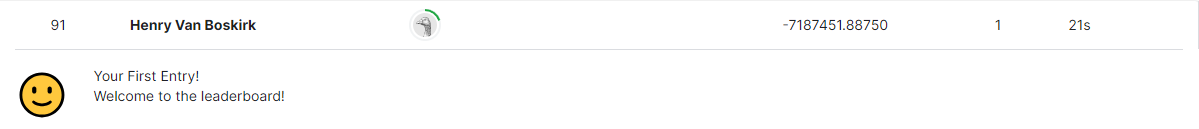

# **2. Linear Regression**

In [87]:
training_df = pd.read_csv('train.csv')

In [88]:
testing_df = pd.read_csv('test.csv')

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X4_mean']



In [90]:
X.head()

,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,SOIL_bdod_30.60cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12
0,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,145,...,0.455806,0.506616,0.531718,0.509142,0.444842,0.423471,0.444432,0.472432,0.448272,0.403038
1,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,143,...,0.277699,0.270621,0.264534,0.244796,0.253600,0.251986,0.261273,0.279112,0.294724,0.311158
2,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,126,...,0.436853,0.439573,0.446150,0.451612,0.444537,0.434794,0.444734,0.455066,0.458448,0.455440
3,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,131,...,0.334322,0.328369,0.316033,0.305631,0.321647,0.329818,0.318389,0.350208,0.349995,0.348838
4,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,138,...,0.358661,0.419538,0.466089,0.562763,0.608216,0.610752,0.565290,0.488996,0.457526,0.448166


In [91]:
y.shape

(55489,)

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print(f'MSE: {mse}')


MSE: 0.026828690592281275


In [93]:
y_pred.shape

(11098,)

In [94]:
linear_regression = sample.copy()
linear_regression[['X4', 'X11', 'X18', 'X50', 'X26', 'X3112']] = 0

In [95]:
linear_regression.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0,0,0,0,0,0
1,195524180,0,0,0,0,0,0
2,172220512,0,0,0,0,0,0
3,195824490,0,0,0,0,0,0
4,191793047,0,0,0,0,0,0


In [96]:
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)

X4_predictions = model.predict(test_features_scaled)

linear_regression['X4'] = X4_predictions

In [97]:
linear_regression.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.442177,0,0,0,0,0
1,195524180,0.434238,0,0,0,0,0
2,172220512,0.571163,0,0,0,0,0
3,195824490,0.588383,0,0,0,0,0
4,191793047,0.457446,0,0,0,0,0


In [98]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X11_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print(f'MSE: {mse}')

MSE: 408110936.78209245


In [99]:
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)

X11_predictions = model.predict(test_features_scaled)

linear_regression['X11'] = X11_predictions

In [100]:
linear_regression.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.442177,-94.672840,0,0,0,0
1,195524180,0.434238,148.951907,0,0,0,0
2,172220512,0.571163,-309.652520,0,0,0,0
3,195824490,0.588383,165.673857,0,0,0,0
4,191793047,0.457446,372.921867,0,0,0,0


In [101]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X18_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print(f'MSE: {mse}')

MSE: 13282960002471.822


In [102]:
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)

X18_predictions = model.predict(test_features_scaled)

linear_regression['X18'] = X18_predictions

In [103]:
linear_regression.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.442177,-94.672840,-137731.629228,0,0,0
1,195524180,0.434238,148.951907,67335.156553,0,0,0
2,172220512,0.571163,-309.652520,-60907.869388,0,0,0
3,195824490,0.588383,165.673857,-112134.845932,0,0,0
4,191793047,0.457446,372.921867,25500.398735,0,0,0


In [104]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X50_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print(f'MSE: {mse}')

MSE: 11994.640847442832


In [105]:
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)

X50_predictions = model.predict(test_features_scaled)

linear_regression['X50'] = X50_predictions

In [106]:
linear_regression.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.442177,-94.672840,-137731.629228,20.356861,0,0
1,195524180,0.434238,148.951907,67335.156553,81.709198,0,0
2,172220512,0.571163,-309.652520,-60907.869388,1.372522,0,0
3,195824490,0.588383,165.673857,-112134.845932,126.640605,0,0
4,191793047,0.457446,372.921867,25500.398735,120.198004,0,0


In [107]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X26_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print(f'MSE: {mse}')

MSE: 203777801578.50577


In [108]:
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)

X26_predictions = model.predict(test_features_scaled)

linear_regression['X26'] = X26_predictions

In [109]:
linear_regression.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.442177,-94.672840,-137731.629228,20.356861,6679.445171,0
1,195524180,0.434238,148.951907,67335.156553,81.709198,5426.869214,0
2,172220512,0.571163,-309.652520,-60907.869388,1.372522,-5937.840866,0
3,195824490,0.588383,165.673857,-112134.845932,126.640605,-2316.980964,0
4,191793047,0.457446,372.921867,25500.398735,120.198004,8863.162264,0


In [110]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X3112_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print(f'MSE: {mse}')

MSE: 37784809489409.38


In [111]:
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)

X3112_predictions = model.predict(test_features_scaled)

linear_regression['X3112'] = X3112_predictions

In [112]:
linear_regression.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.442177,-94.672840,-137731.629228,20.356861,6679.445171,7.113600e+06
1,195524180,0.434238,148.951907,67335.156553,81.709198,5426.869214,1.998673e+07
2,172220512,0.571163,-309.652520,-60907.869388,1.372522,-5937.840866,3.049716e+06
3,195824490,0.588383,165.673857,-112134.845932,126.640605,-2316.980964,-4.746416e+06
4,191793047,0.457446,372.921867,25500.398735,120.198004,8863.162264,-3.731513e+04


In [113]:
linear_regression.to_csv('linear_regression_first_attempt.csv', index=False)

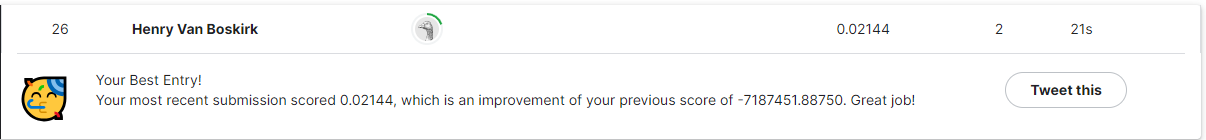

**The score improved to 0.02144. My predictions were made by 6 separate Linear Regression models, one for each trait, using only the ancilliary variables**

**Now, I will do some basic feature selection. The previous Linear Regression models used 176 features. I will select only the top 50 most correlated features and try Linear Regression again**

In [114]:
X4_correlation=training_df.corr()['X4_mean'].sort_values(key=abs, ascending=False)
print(X4_correlation)

X4_mean                                                                 1.000000
SOIL_silt_30.60cm_mean_0.01_deg                                        -0.247012
SOIL_silt_0.5cm_mean_0.01_deg                                          -0.246907
SOIL_silt_5.15cm_mean_0.01_deg                                         -0.245600
SOIL_silt_15.30cm_mean_0.01_deg                                        -0.243867
                                                                          ...   
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m9    -0.002857
X3112_mean                                                             -0.001856
SOIL_clay_5.15cm_mean_0.01_deg                                          0.001565
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11    0.000623
VOD_Ku_1987_2017_multiyear_mean_m03                                     0.000340
Name: X4_mean, Length: 176, dtype: float64


In [115]:
X4_correlation = X4_correlation.drop(labels=['X4_mean'])
#since X4_mean and X4_mean have a correlation of 1

In [116]:
X4_features_top50 = X4_correlation.abs().sort_values(ascending=False).head(50).index
X4_features_top50

Index(['SOIL_silt_30.60cm_mean_0.01_deg', 'SOIL_silt_0.5cm_mean_0.01_deg',
       'SOIL_silt_5.15cm_mean_0.01_deg', 'SOIL_silt_15.30cm_mean_0.01_deg',
       'SOIL_silt_60.100cm_mean_0.01_deg', 'SOIL_silt_100.200cm_mean_0.01_deg',
       'WORLDCLIM_BIO1_annual_mean_temperature',
       'WORLDCLIM_BIO4_temperature_seasonality',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m2',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1',
       'SOIL_nitrogen_0.5cm_mean_0.01_deg',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m2',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m2',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1',
       'SOIL_sand_0.5cm_mean_0.01_deg',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m3',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m12',
       'MODIS_2000.2020_monthly_mean_sur

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [118]:
X4_features_top50_filtered = [col for col in X4_features_top50 if col in training_df.columns and col not in ['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd']]

X = training_df[X4_features_top50_filtered]
y = training_df['X4_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse}')

MSE: 0.027015199568644444


In [119]:
linear_regression_feature_selection = sample.copy()
linear_regression_feature_selection[['X4', 'X11', 'X18', 'X50', 'X26', 'X3112']] = 0

In [120]:
test_features = testing_df[X4_features_top50_filtered]

test_features_scaled = scaler.transform(test_features)

X4_predictions = model.predict(test_features_scaled)

linear_regression_feature_selection['X4'] = X4_predictions

In [121]:
linear_regression_feature_selection.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.430665,0,0,0,0,0
1,195524180,0.405674,0,0,0,0,0
2,172220512,0.566089,0,0,0,0,0
3,195824490,0.557900,0,0,0,0,0
4,191793047,0.404130,0,0,0,0,0


In [122]:
X11_correlation=training_df.corr()['X11_mean'].sort_values(key=abs, ascending=False)

In [123]:
X11_correlation = X11_correlation.drop(labels=['X11_mean'])

In [128]:
X11_features_top50 = X11_correlation.abs().sort_values(ascending=False).head(50).index

In [125]:
X11_features_top50_filtered = [col for col in X4_features_top50 if col in training_df.columns and col not in ['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd']]

X = training_df[X11_features_top50_filtered]
y = training_df['X11_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse}')

MSE: 408118315.1214213


In [126]:
test_features = testing_df[X11_features_top50_filtered]

test_features_scaled = scaler.transform(test_features)

X11_predictions = model.predict(test_features_scaled)

linear_regression_feature_selection['X11'] = X11_predictions

In [127]:
linear_regression_feature_selection.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.430665,-187.454656,0,0,0,0
1,195524180,0.405674,-27.693976,0,0,0,0
2,172220512,0.566089,-30.796373,0,0,0,0
3,195824490,0.557900,163.985764,0,0,0,0
4,191793047,0.404130,-469.015313,0,0,0,0


In [129]:
X18_correlation=training_df.corr()['X18_mean'].sort_values(key=abs, ascending=False)
X18_correlation = X18_correlation.drop(labels=['X18_mean'])
X18_features_top50 = X18_correlation.abs().sort_values(ascending=False).head(50).index
X18_features_top50_filtered = [col for col in X18_features_top50 if col in training_df.columns and col not in ['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd']]

X = training_df[X18_features_top50_filtered]
y = training_df['X18_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse}')
test_features = testing_df[X18_features_top50_filtered]

test_features_scaled = scaler.transform(test_features)

X18_predictions = model.predict(test_features_scaled)

linear_regression_feature_selection['X18'] = X18_predictions
linear_regression_feature_selection.head()

MSE: 13323547450833.666


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.430665,-187.454656,-108537.790604,0,0,0
1,195524180,0.405674,-27.693976,-22450.924663,0,0,0
2,172220512,0.566089,-30.796373,-59355.363286,0,0,0
3,195824490,0.557900,163.985764,-8452.429908,0,0,0
4,191793047,0.404130,-469.015313,-8323.197276,0,0,0


In [130]:
X26_correlation = training_df.corr()['X26_mean'].sort_values(key=abs, ascending=False)
X26_correlation = X26_correlation.drop(labels=['X26_mean'])
X26_features_top50 = X26_correlation.abs().sort_values(ascending=False).head(50).index
X26_features_top50_filtered = [col for col in X26_features_top50 if col in training_df.columns and col not in ['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd']]

X = training_df[X26_features_top50_filtered]
y = training_df['X26_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse}')
test_features = testing_df[X26_features_top50_filtered]

test_features_scaled = scaler.transform(test_features)

X26_predictions = model.predict(test_features_scaled)

linear_regression_feature_selection['X26'] = X26_predictions
linear_regression_feature_selection.head()


MSE: 204891751661.67093


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.430665,-187.454656,-108537.790604,0,7721.265001,0
1,195524180,0.405674,-27.693976,-22450.924663,0,-10438.435118,0
2,172220512,0.566089,-30.796373,-59355.363286,0,-6330.781887,0
3,195824490,0.557900,163.985764,-8452.429908,0,-9287.528938,0
4,191793047,0.404130,-469.015313,-8323.197276,0,2828.743206,0


In [131]:
X50_correlation = training_df.corr()['X50_mean'].sort_values(key=abs, ascending=False)
X50_correlation = X50_correlation.drop(labels=['X50_mean'])
X50_features_top50 = X50_correlation.abs().sort_values(ascending=False).head(50).index
X50_features_top50_filtered = [col for col in X50_features_top50 if col in training_df.columns and col not in ['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd']]

X = training_df[X50_features_top50_filtered]
y = training_df['X50_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse}')
test_features = testing_df[X50_features_top50_filtered]

test_features_scaled = scaler.transform(test_features)

X50_predictions = model.predict(test_features_scaled)

linear_regression_feature_selection['X50'] = X50_predictions
linear_regression_feature_selection.head()


MSE: 3684.4808382768983


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.430665,-187.454656,-108537.790604,-40.534112,7721.265001,0
1,195524180,0.405674,-27.693976,-22450.924663,-54.686149,-10438.435118,0
2,172220512,0.566089,-30.796373,-59355.363286,-29.601173,-6330.781887,0
3,195824490,0.557900,163.985764,-8452.429908,126.395004,-9287.528938,0
4,191793047,0.404130,-469.015313,-8323.197276,-40.716955,2828.743206,0


In [132]:
X3112_correlation = training_df.corr()['X3112_mean'].sort_values(key=abs, ascending=False)
X3112_correlation = X3112_correlation.drop(labels=['X3112_mean'])
X3112_features_top50 = X3112_correlation.abs().sort_values(ascending=False).head(50).index
X3112_features_top50_filtered = [col for col in X3112_features_top50 if col in training_df.columns and col not in ['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd']]

X = training_df[X3112_features_top50_filtered]
y = training_df['X3112_mean']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse}')
test_features = testing_df[X3112_features_top50_filtered]

test_features_scaled = scaler.transform(test_features)

X3112_predictions = model.predict(test_features_scaled)

linear_regression_feature_selection['X3112'] = X3112_predictions
linear_regression_feature_selection.head()


MSE: 8215484185094.747


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.430665,-187.454656,-108537.790604,-40.534112,7721.265001,4.861418e+05
1,195524180,0.405674,-27.693976,-22450.924663,-54.686149,-10438.435118,9.389853e+06
2,172220512,0.566089,-30.796373,-59355.363286,-29.601173,-6330.781887,4.345054e+06
3,195824490,0.557900,163.985764,-8452.429908,126.395004,-9287.528938,9.245563e+03
4,191793047,0.404130,-469.015313,-8323.197276,-40.716955,2828.743206,4.896268e+06


In [133]:
linear_regression_feature_selection.to_csv('linear_regression_feature_selection.csv', index=False)

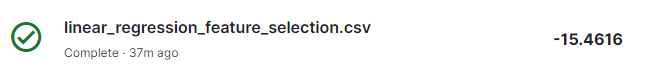

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
gradient_boost_regression = sample.copy()
gradient_boost_regression[['X4', 'X11', 'X18', 'X50', 'X26', 'X3112']] = 0

In [137]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X4_mean']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.026741697139237304


In [139]:
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)


X4_predictions_gbr = gbr.predict(test_features_scaled)
gradient_boost_regression['X4'] = X4_predictions_gbr

In [140]:
gradient_boost_regression.head()

,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.440636,0,0,0,0,0
1,195524180,0.438323,0,0,0,0,0
2,172220512,0.568897,0,0,0,0,0
3,195824490,0.565450,0,0,0,0,0
4,191793047,0.439427,0,0,0,0,0


In [141]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X11_mean']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)


X11_predictions_gbr = gbr.predict(test_features_scaled)
gradient_boost_regression['X11'] = X11_predictions_gbr
gradient_boost_regression.head()

MSE: 414657757.89956


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.440636,23.910731,0,0,0,0
1,195524180,0.438323,12.207539,0,0,0,0
2,172220512,0.568897,19.265256,0,0,0,0
3,195824490,0.565450,21.364493,0,0,0,0
4,191793047,0.439427,22.666057,0,0,0,0


In [142]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X18_mean']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)


X18_predictions_gbr = gbr.predict(test_features_scaled)
gradient_boost_regression['X18'] = X18_predictions_gbr
gradient_boost_regression.head()

MSE: 13334053709124.654


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.440636,23.910731,-33.581400,0,0,0
1,195524180,0.438323,12.207539,-109.343489,0,0,0
2,172220512,0.568897,19.265256,-34.230778,0,0,0
3,195824490,0.565450,21.364493,-15.495359,0,0,0
4,191793047,0.439427,22.666057,-7.081260,0,0,0


In [143]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X50_mean']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)


X50_predictions_gbr = gbr.predict(test_features_scaled)
gradient_boost_regression['X50'] = X50_predictions_gbr
gradient_boost_regression.head()

MSE: 54629.35018845869


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.440636,23.910731,-33.581400,1.924482,0,0
1,195524180,0.438323,12.207539,-109.343489,1.924482,0,0
2,172220512,0.568897,19.265256,-34.230778,1.924482,0,0
3,195824490,0.565450,21.364493,-15.495359,1.924482,0,0
4,191793047,0.439427,22.666057,-7.081260,1.924482,0,0


In [144]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X26_mean']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)


X26_predictions_gbr = gbr.predict(test_features_scaled)
gradient_boost_regression['X26'] = X26_predictions_gbr
gradient_boost_regression.head()

MSE: 222397440924.09424


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.440636,23.910731,-33.581400,1.924482,-219.884918,0
1,195524180,0.438323,12.207539,-109.343489,1.924482,-685.820272,0
2,172220512,0.568897,19.265256,-34.230778,1.924482,41.370895,0
3,195824490,0.565450,21.364493,-15.495359,1.924482,-257.996605,0
4,191793047,0.439427,22.666057,-7.081260,1.924482,1384.218549,0


In [145]:
X = training_df.drop(['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis=1)
y = training_df['X3112_mean']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
test_features = testing_df.drop(['id'], axis=1)

test_features_scaled = scaler.transform(test_features)


X3112_predictions_gbr = gbr.predict(test_features_scaled)
gradient_boost_regression['X3112'] = X3112_predictions_gbr
gradient_boost_regression.head()

MSE: 2947334157823088.0


,id,X4,X11,X18,X50,X26,X3112
0,195066138,0.440636,23.910731,-33.581400,1.924482,-219.884918,-2703.168158
1,195524180,0.438323,12.207539,-109.343489,1.924482,-685.820272,-30181.336566
2,172220512,0.568897,19.265256,-34.230778,1.924482,41.370895,12799.179654
3,195824490,0.565450,21.364493,-15.495359,1.924482,-257.996605,1917.854449
4,191793047,0.439427,22.666057,-7.081260,1.924482,1384.218549,1950.212054


In [147]:
gradient_boost_regression.to_csv('gradient_boost_regression.csv', index=False)